In [1]:
# Import core libraries
#import tweepy           # Obtain Tweets via API
import re               # Obtain expressions 
from gensim.models import Word2Vec    #Import gensim Word2Fec
from sklearn.decomposition import PCA #Grab PCA functions

In [2]:
#Load data
import pandas as pd
from pandas import DataFrame
words = pd.read_csv('wordlist3.csv')
print(words[0:5])

     Word
0     ant
1    bear
2  beaver
3     bee
4    bird


In [3]:
df = words.to_string()
print(df)

                  Word
0                  ant
1                 bear
2               beaver
3                  bee
4                 bird
5                  bug
6              chicken
7                 deer
8              dolphin
9               donkey
10               eagle
11                 fly
12             giraffe
13             gorilla
14         grasshopper
15               hippo
16            kangaroo
17             ladybug
18             leopard
19              lizard
20               llama
21             lobster
22               moose
23            mosquito
24               mouse
25             ostrich
26               panda
27              parrot
28             peacock
29             pelican
30             penguin
31           porcupine
32              rabbit
33             raccoon
34          rhinoceros
35             rooster
36            scorpion
37            seahorse
38               shark
39               sheep
40               shell
41               skunk
42         

In [52]:
Word3 = set(words['Word'].str.lower().str.split(' ').sum())
Word4 = str(Word3)

TypeError: list indices must be integers or slices, not str

In [72]:
print(Word4)

{'', 'bracelet', 'harp', 'flood', 'zebra', 'tunnel', 'helicopter', 'shutter', 'crockpot', 'clock', 'hearse', 'wire', 'mistletoe', 'beak', 'teacher', 'rock', 'tablet', 'heel', 'sandbox', 'diploma', 'salt', 'forest', 'trombone', 'bar', 'diaper', 'well', 'baton', 'lights', 'drummer', 'dime', 'hubcap', 'saltshaker', 'liquor', 'escalator', 'appletree', 'turnip', 'beach', 'lollipop', 'bagpipes', 'tanktop', 'falcon', 'penny', 'crowbar', 'earmuffs', 'journal', 'smoothie', 'button', 'money', 'braces', 'children', 'parkinglot', 'puzzle', 'sunglasses', 'trampoline', 'motel', 'freezer', 'shallots', 'sandal', 'nail', 'lipstick', 'shavingcream', 'slingshot', 'airplane', 'hood', 'dove', 'horns', 'pail', 'sandwich', 'card', 'rubberbands', 'garagedoor', 'driveway', 'fire', 'grate', 'glass', 'bonfire', 'lasagna', 'tissuebox', 'blackberry', 'kneel', 'hug', 'toothbrush', 'maracas', 'beanbagchair', 'gamecontroller', 'textbook', 'picnic', 'robot', 'skeleton', 'pool', 'jack-o-lantern', 'tripod', 'punchbowl',

### I know that using the emoticons_str is not doing anything in the data set, but I figured running the data through these tokenzers would help clean up the data for word2vec.  Was this right?
- I am not sure why the output is not of length 5, and I am also nto sure why there are string characters of "," and "'" everywhere.  I am guessing it is from this line of code:
"Word3 = set(words['Word'].str.lower().str.split(' ').sum())" 

In [6]:
    


#def tokenise(s):
#    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenise(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

#Get the tokenized value for each word
tokenised = []
for i in Word4:
    tokens = preprocess(Word4)
    tokenised.append(tokens)

#Grab the first 5
print(tokenised[0:4])

[['{', "'", "'", ',', "'", 'bracelet', "'", ',', "'", 'harp', "'", ',', "'", 'flood', "'", ',', "'", 'zebra', "'", ',', "'", 'tunnel', "'", ',', "'", 'helicopter', "'", ',', "'", 'shutter', "'", ',', "'", 'crockpot', "'", ',', "'", 'clock', "'", ',', "'", 'hearse', "'", ',', "'", 'wire', "'", ',', "'", 'mistletoe', "'", ',', "'", 'beak', "'", ',', "'", 'teacher', "'", ',', "'", 'rock', "'", ',', "'", 'tablet', "'", ',', "'", 'heel', "'", ',', "'", 'sandbox', "'", ',', "'", 'diploma', "'", ',', "'", 'salt', "'", ',', "'", 'forest', "'", ',', "'", 'trombone', "'", ',', "'", 'bar', "'", ',', "'", 'diaper', "'", ',', "'", 'well', "'", ',', "'", 'baton', "'", ',', "'", 'lights', "'", ',', "'", 'drummer', "'", ',', "'", 'dime', "'", ',', "'", 'hubcap', "'", ',', "'", 'saltshaker', "'", ',', "'", 'liquor', "'", ',', "'", 'escalator', "'", ',', "'", 'appletree', "'", ',', "'", 'turnip', "'", ',', "'", 'beach', "'", ',', "'", 'lollipop', "'", ',', "'", 'bagpipes', "'", ',', "'", 'tanktop', "'",

In [64]:
for i in tokenised:
    #print(i)
    break
    for j in i:
        print(j)

In [76]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 

import warnings


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [79]:
words = word_tokenize(Word4)
words

['{',
 '``',
 ',',
 "'bracelet",
 "'",
 ',',
 "'harp",
 "'",
 ',',
 "'flood",
 "'",
 ',',
 "'zebra",
 "'",
 ',',
 "'tunnel",
 "'",
 ',',
 "'helicopter",
 "'",
 ',',
 "'shutter",
 "'",
 ',',
 "'crockpot",
 "'",
 ',',
 "'clock",
 "'",
 ',',
 "'hearse",
 "'",
 ',',
 "'wire",
 "'",
 ',',
 "'mistletoe",
 "'",
 ',',
 "'beak",
 "'",
 ',',
 "'teacher",
 "'",
 ',',
 "'rock",
 "'",
 ',',
 "'tablet",
 "'",
 ',',
 "'heel",
 "'",
 ',',
 "'sandbox",
 "'",
 ',',
 "'diploma",
 "'",
 ',',
 "'salt",
 "'",
 ',',
 "'forest",
 "'",
 ',',
 "'trombone",
 "'",
 ',',
 "'bar",
 "'",
 ',',
 "'diaper",
 "'",
 ',',
 "'well",
 "'",
 ',',
 "'baton",
 "'",
 ',',
 "'lights",
 "'",
 ',',
 "'drummer",
 "'",
 ',',
 "'dime",
 "'",
 ',',
 "'hubcap",
 "'",
 ',',
 "'saltshaker",
 "'",
 ',',
 "'liquor",
 "'",
 ',',
 "'escalator",
 "'",
 ',',
 "'appletree",
 "'",
 ',',
 "'turnip",
 "'",
 ',',
 "'beach",
 "'",
 ',',
 "'lollipop",
 "'",
 ',',
 "'bagpipes",
 "'",
 ',',
 "'tanktop",
 "'",
 ',',
 "'falcon",
 "'",
 ',',
 "'penny",
 

In [80]:
Word4

"{'', 'bracelet', 'harp', 'flood', 'zebra', 'tunnel', 'helicopter', 'shutter', 'crockpot', 'clock', 'hearse', 'wire', 'mistletoe', 'beak', 'teacher', 'rock', 'tablet', 'heel', 'sandbox', 'diploma', 'salt', 'forest', 'trombone', 'bar', 'diaper', 'well', 'baton', 'lights', 'drummer', 'dime', 'hubcap', 'saltshaker', 'liquor', 'escalator', 'appletree', 'turnip', 'beach', 'lollipop', 'bagpipes', 'tanktop', 'falcon', 'penny', 'crowbar', 'earmuffs', 'journal', 'smoothie', 'button', 'money', 'braces', 'children', 'parkinglot', 'puzzle', 'sunglasses', 'trampoline', 'motel', 'freezer', 'shallots', 'sandal', 'nail', 'lipstick', 'shavingcream', 'slingshot', 'airplane', 'hood', 'dove', 'horns', 'pail', 'sandwich', 'card', 'rubberbands', 'garagedoor', 'driveway', 'fire', 'grate', 'glass', 'bonfire', 'lasagna', 'tissuebox', 'blackberry', 'kneel', 'hug', 'toothbrush', 'maracas', 'beanbagchair', 'gamecontroller', 'textbook', 'picnic', 'robot', 'skeleton', 'pool', 'jack-o-lantern', 'tripod', 'punchbowl'

In [ ]:
tokens = []
for i in Word4:
    replace

In [42]:
#model_len5 = Word2Vec(tokenised, min_count = 3, size = 5)
print(model_len5)
#model_len4 = Word2Vec(tokenised, min_count = 3, size = 4)
print(model_len4)

Word2Vec(vocab=1550, size=5, alpha=0.025)
Word2Vec(vocab=1550, size=4, alpha=0.025)


In [69]:
#model_len3 = Word2Vec(tokenised, min_count = 1, size = 3)
#print(model_len3)
model_len12 = Word2Vec(Word4, min_count = 2, size = 12)
#print(model_len2)
#model_len1 = Word2Vec(tokenised, min_count = 3, size = 1)
#print(model_len1)

In [97]:
out = list(model_len3.wv.vocab)
out

['{',
 "'",
 'suitcase',
 ',',
 'flag',
 'flock',
 'chickenwings',
 'measuringspoons',
 'giftbag',
 'ear',
 'thimble',
 'microscope',
 'holster',
 'popmachine',
 'spatula',
 'newspaper',
 'accountant',
 'tomato',
 'sponge',
 'sock',
 'eraser',
 'brownie',
 'chickadee',
 'telephonewire',
 'cactus',
 'pennant',
 'licenseplate',
 'receipt',
 'soot',
 'pencilcase',
 'cello',
 'triangle',
 'sand',
 'waiter',
 'finishline',
 'house',
 'alligator',
 'plunger',
 'brake',
 'ninja',
 'washcloth',
 'skirt',
 'ticketbooth',
 'badge',
 'shoulder',
 'beets',
 'bonnet',
 'giraffe',
 'handrail',
 'castle',
 'goggles',
 'lasso',
 'grater',
 'poison',
 'pajamas',
 'powerstrip',
 'saxophone',
 'palette',
 'squash',
 'gum',
 'tear',
 'cherry',
 'lapel',
 'earmuffs',
 'elephant',
 'bible',
 'tablet',
 'sugar',
 'ironingboard',
 'peel',
 'knee',
 'footrest',
 'defibrillator',
 'corer',
 'volleyball',
 'easel',
 'crossstitch',
 'gamecontroller',
 'kayak',
 'elevator',
 'sprinkles',
 'violin',
 'tack',
 'umpi

In [32]:
#conduct tsne with sklearn.  PCA does not work with these data because they are not linear
from sklearn.manifold import TSNE

In [70]:
data_subset = model_len12[model_len12.wv.vocab]

<ipython-input-70-34e73a55a2a9>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data_subset = model_len12[model_len12.wv.vocab]


In [71]:
model_len12.wv.vocab

{"'": <gensim.models.keyedvectors.Vocab at 0x2af279ccdc0>,
 ',': <gensim.models.keyedvectors.Vocab at 0x2af279bcd30>,
 ' ': <gensim.models.keyedvectors.Vocab at 0x2af279bcb50>,
 'b': <gensim.models.keyedvectors.Vocab at 0x2af279bcac0>,
 'r': <gensim.models.keyedvectors.Vocab at 0x2af279bcca0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x2af279bcb80>,
 'c': <gensim.models.keyedvectors.Vocab at 0x2af279bcc70>,
 'e': <gensim.models.keyedvectors.Vocab at 0x2af279bc640>,
 'l': <gensim.models.keyedvectors.Vocab at 0x2af279bcd00>,
 't': <gensim.models.keyedvectors.Vocab at 0x2af279bc7f0>,
 'h': <gensim.models.keyedvectors.Vocab at 0x2af279bcf40>,
 'p': <gensim.models.keyedvectors.Vocab at 0x2af279bcbb0>,
 'f': <gensim.models.keyedvectors.Vocab at 0x2af279bc550>,
 'o': <gensim.models.keyedvectors.Vocab at 0x2af279bce50>,
 'd': <gensim.models.keyedvectors.Vocab at 0x2af279bc8e0>,
 'z': <gensim.models.keyedvectors.Vocab at 0x2af279bc730>,
 'u': <gensim.models.keyedvectors.Vocab at 0x2af279bcdf0

In [41]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1550 samples in 0.002s...
[t-SNE] Computed neighbors for 1550 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1550
[t-SNE] Computed conditional probabilities for sample 1550 / 1550
[t-SNE] Mean sigma: 8.139838
[t-SNE] KL divergence after 100 iterations with early exaggeration: 73.591187
[t-SNE] KL divergence after 300 iterations: 1.578371


In [44]:
data_subset = model_len10[model_len10.wv.vocab]
model_len10.wv.vocab

<ipython-input-44-97f2cd403162>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data_subset = model_len10[model_len10.wv.vocab]


{'{': <gensim.models.keyedvectors.Vocab at 0x2af26279e80>,
 "'": <gensim.models.keyedvectors.Vocab at 0x2af26279ee0>,
 ',': <gensim.models.keyedvectors.Vocab at 0x2af262e9070>,
 'bracelet': <gensim.models.keyedvectors.Vocab at 0x2af262e90a0>,
 'harp': <gensim.models.keyedvectors.Vocab at 0x2af26296f40>,
 'flood': <gensim.models.keyedvectors.Vocab at 0x2af26296e80>,
 'zebra': <gensim.models.keyedvectors.Vocab at 0x2af26296fd0>,
 'tunnel': <gensim.models.keyedvectors.Vocab at 0x2af26296f70>,
 'helicopter': <gensim.models.keyedvectors.Vocab at 0x2af26296ee0>,
 'shutter': <gensim.models.keyedvectors.Vocab at 0x2af26296e50>,
 'crockpot': <gensim.models.keyedvectors.Vocab at 0x2af26296df0>,
 'clock': <gensim.models.keyedvectors.Vocab at 0x2af26296d60>,
 'hearse': <gensim.models.keyedvectors.Vocab at 0x2af26296d00>,
 'wire': <gensim.models.keyedvectors.Vocab at 0x2af26296ca0>,
 'mistletoe': <gensim.models.keyedvectors.Vocab at 0x2af262969a0>,
 'beak': <gensim.models.keyedvectors.Vocab at 0x2a

In [45]:
words = list(model_len10.wv.vocab)
for i in words: 
    print(i)

{
'
,
bracelet
harp
flood
zebra
tunnel
helicopter
shutter
crockpot
clock
hearse
wire
mistletoe
beak
teacher
rock
tablet
heel
sandbox
diploma
salt
forest
trombone
bar
diaper
well
baton
lights
drummer
dime
hubcap
saltshaker
liquor
escalator
appletree
turnip
beach
lollipop
bagpipes
tanktop
falcon
penny
crowbar
earmuffs
journal
smoothie
button
money
braces
children
parkinglot
puzzle
sunglasses
trampoline
motel
freezer
shallots
sandal
nail
lipstick
shavingcream
slingshot
airplane
hood
dove
horns
pail
sandwich
card
rubberbands
garagedoor
driveway
fire
grate
glass
bonfire
lasagna
tissuebox
blackberry
kneel
hug
toothbrush
maracas
beanbagchair
gamecontroller
textbook
picnic
robot
skeleton
pool
jack-o-lantern
tripod
punchbowl
classroom
porcupine
handkerchief
dancer
poker
griddle
blouse
towel
brain
egg
thief
bull
screw
seatbelt
sombrero
stingray
mansion
rose
chef
chicken
powerstrip
chessboard
vase
snowmobile
nun
lantern
lockers
dentist
jackhammer
palmtree
clownfish
ashes
coach
lace
seahorse
peanu

In [46]:
words

['{',
 "'",
 ',',
 'bracelet',
 'harp',
 'flood',
 'zebra',
 'tunnel',
 'helicopter',
 'shutter',
 'crockpot',
 'clock',
 'hearse',
 'wire',
 'mistletoe',
 'beak',
 'teacher',
 'rock',
 'tablet',
 'heel',
 'sandbox',
 'diploma',
 'salt',
 'forest',
 'trombone',
 'bar',
 'diaper',
 'well',
 'baton',
 'lights',
 'drummer',
 'dime',
 'hubcap',
 'saltshaker',
 'liquor',
 'escalator',
 'appletree',
 'turnip',
 'beach',
 'lollipop',
 'bagpipes',
 'tanktop',
 'falcon',
 'penny',
 'crowbar',
 'earmuffs',
 'journal',
 'smoothie',
 'button',
 'money',
 'braces',
 'children',
 'parkinglot',
 'puzzle',
 'sunglasses',
 'trampoline',
 'motel',
 'freezer',
 'shallots',
 'sandal',
 'nail',
 'lipstick',
 'shavingcream',
 'slingshot',
 'airplane',
 'hood',
 'dove',
 'horns',
 'pail',
 'sandwich',
 'card',
 'rubberbands',
 'garagedoor',
 'driveway',
 'fire',
 'grate',
 'glass',
 'bonfire',
 'lasagna',
 'tissuebox',
 'blackberry',
 'kneel',
 'hug',
 'toothbrush',
 'maracas',
 'beanbagchair',
 'gamecontrol

In [35]:
tsne_results

array([[ 1.7645144 , -8.326208  ],
       [15.921379  , -0.06239138],
       [15.921082  , -0.06235316],
       ...,
       [ 8.479314  ,  1.2188163 ],
       [ 8.566341  ,  1.4468377 ],
       [ 8.682108  ,  1.638582  ]], dtype=float32)

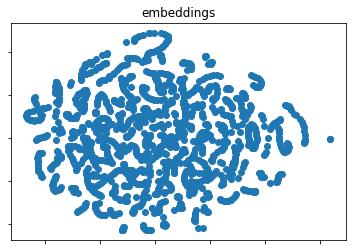

In [36]:
#Plot the t-SNE output
#Plot helpers
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(tsne_results[:, 0], tsne_results[:, 1], 'o')
ax.set_title('embeddings')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
plt.show()

In [38]:
tsne_results

array([[ 1.7645144 , -8.326208  ],
       [15.921379  , -0.06239138],
       [15.921082  , -0.06235316],
       ...,
       [ 8.479314  ,  1.2188163 ],
       [ 8.566341  ,  1.4468377 ],
       [ 8.682108  ,  1.638582  ]], dtype=float32)

In [37]:
import plotly.express as px
fig = px.scatter( projections, x=0, y=1, color=df.species, labels={'color': 'species'} ) fig.show()


In [88]:
#Visualize with PCA
X2 = model_len3[model_len3.wv.vocab]
pca = PCA(n_components = 2)
result3 = pca.fit_transform(X2)


<ipython-input-88-44c8e9509f62>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X2 = model_len3[model_len3.wv.vocab]


In [89]:
total_var = pca.explained_variance_ratio_.sum() * 100

In [45]:
X = model_len5[model_len5.wv.vocab]
pca = PCA(n_components = 2)
result5 = pca.fit_transform(X)

<ipython-input-45-772d20515995>:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [46]:
fig5 = px.scatter_matrix(
    result5,
    dimensions=range(2),
    title=f'Embedding length 5 <br> Total Explained Variance: {total_var:.2f}%',
)
fig5.show()

In [40]:
X = model_len4[model_len4.wv.vocab]
pca = PCA(n_components = 2)
result4 = pca.fit_transform(X)

<ipython-input-40-5798eb277028>:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [91]:
#conda install -c plotly plotly=4.14.3
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

In [21]:
fig4 = px.scatter_matrix(
    result4,
    dimensions=range(2),
    title=f'Embedding length 4: <br> Total Explained Variance: {total_var:.2f}%',
)
fig4.show()

NameError: name 'result4' is not defined

In [98]:
result3['words'] = words['Word']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [93]:
fig = px.scatter_matrix(
    result3,
    dimensions=range(2),
    title=f'Embedding length 3: <br> Total Explained Variance: {total_var:.2f}%',
    hover_name='words'
)
fig.show()

ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of [0, 1] but received: words

In [47]:
#Visualize with PCA
X = model_len2[model_len2.wv.vocab]
pca = PCA(n_components = 2)
result2 = pca.fit_transform(X)
fig2 = px.scatter_matrix(
    result2,
    dimensions=range(2),
    title=f'Embedding length 2: <br> Total Explained Variance: {total_var:.2f}%',
)
fig2.show()

<ipython-input-47-64d196a1e362>:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



<IPython.core.display.Javascript object>


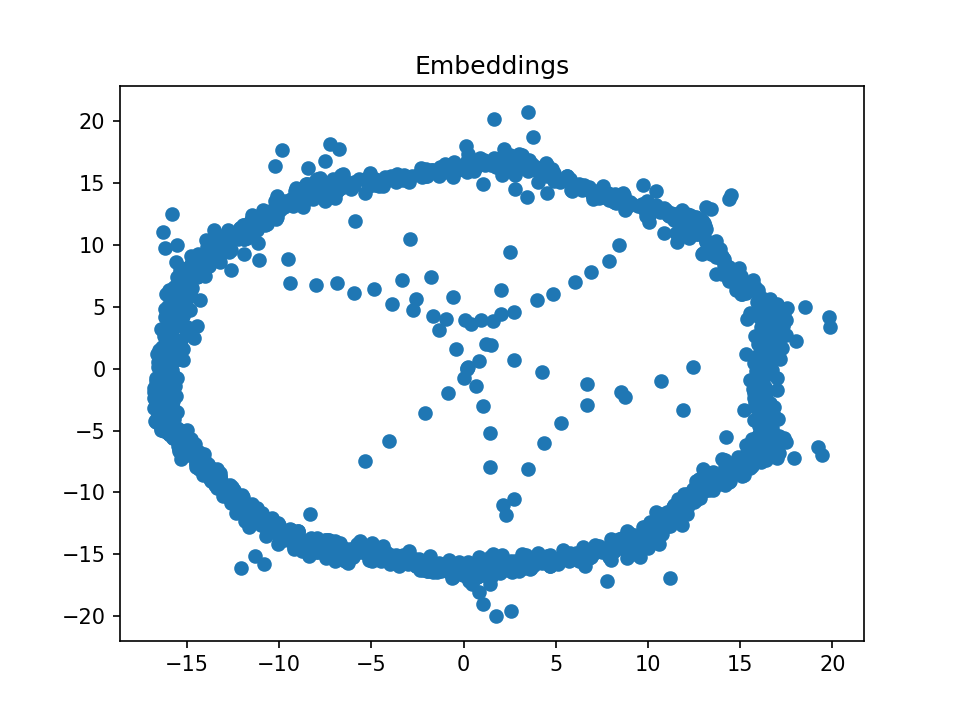

In [39]:
#Plot helpers
import matplotlib
import matplotlib.pyplot as plt
#Enable matplotlib to be interactive (zoom etc)
%matplotlib notebook

# create a plot of the projection
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Embeddings')
plt.show()

# Could not figure out how to install tsne

In [ ]:
#t-SNE
from tsne import tsne #Import the t-SNE algorithm

Y = tsne(X, 2, 50, 30.0)

# I am going to try and pull the word embeddings from the wikiGigaworld data set to see if the pca is more interpretable

In [1]:
import gensim
from gensim.matutils import corpus2csc
from gensim.corpora import Dictionary
import pandas as pd
import numpy as np

In [5]:
words = pd.read_csv('wordlist3.csv')
words.head()

,Word
0,ant
1,bear
2,beaver
3,bee
4,bird


In [6]:
#Method 1: Get word embeddings for all available words from Wikigigaworld.
import gensim.downloader as api
# Download dataset
glove_model300 = api.load('glove-wiki-gigaword-300')
#create np array called word_array
word_array = np.empty((0, 300))
not_found = []
for idx, row in words.iterrows():
    try:
        result = glove_model300.word_vec(row[0])
        word_array = np.append(word_array, [result], axis = 0)
    except KeyError:
        not_found.append(row[0]) 


In [11]:
X = words['Word']
X.head()

0       ant
1      bear
2    beaver
3       bee
4      bird
Name: Word, dtype: object

In [12]:
#word_array = np.empty((0, 300))
for idx, row in enumerate(X):
    try:
        word_array = np.empty((0, 300))
        result = glove_model300.word_vec(row)
        word_array = np.append(word_array, [result], axis = 0)
        X[idx] = word_array
    except:
         X[idx] = 'None'

In [102]:
#Visualize with PCA
word_vectors = np.asanyarray(X, dtype='float')

ValueError: setting an array element with a sequence.

In [101]:
X = word_vectors
pca = PCA(n_components = 2)
result2 = pca.fit_transform(X)
fig2 = px.scatter_matrix(
    result2,
    dimensions=range(2),
    title=f'Embedding length 2: <br> Total Explained Variance: {total_var:.2f}%',
)
fig2.show()

ValueError: setting an array element with a sequence.

In [57]:
day1 = np.random.randint(255, size=(1, 81, 141))

In [58]:
print(day1)

[[[186 159  44 ... 189 235  88]
  [ 33  53 177 ... 224  11  49]
  [149 102 134 ... 103 192  68]
  ...
  [128  49 252 ...  45   1   8]
  [134   9 204 ... 170 111  25]
  [111  57  84 ... 194 216  57]]]


In [61]:
X.shape

(1548,)

In [62]:
a = np.zeros((10, 2))

In [64]:
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [69]:
a.shape()

TypeError: 'tuple' object is not callable

In [68]:
b = a.T

TypeError: 'tuple' object is not callable

In [79]:
df = pd.DataFrame(X)
df=pd.DataFrame(df)
df.shape
df.head()

,0
0,"[[-0.26462000608444214, 0.8037099838256836, 0...."
1,"[[0.08617699891328812, 0.05475499853491783, -0..."
2,"[[-0.3513999879360199, -0.007505000103265047, ..."
3,"[[-0.26607000827789307, 0.3776000142097473, -0..."
4,"[[0.31525999307632446, 0.6543499827384949, -0...."


In [99]:
result3.to_csv(r'C:\Users\alexa\OneDrive\Documents\GitHub\SwiderskiLakhani\wordembeddings.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'